# Runup dataset

_This notebook is adapted from the [py-wave-runup](https://github.com/chrisleaman/py-wave-runup) examples from [Vitousek et al. (2017)](https://www.nature.com/articles/s41598-017-01362-7)._

In this example, we will evaluate the compiled wave runup observations provided by **Power
et al (2018)**.

> Power, H.E., Gharabaghi, B., Bonakdari, H., Robertson, B., Atkinson, A.L., Baldock, T.E., 2018. Prediction of wave runup on beaches using Gene-Expression Programming and empirical relationships. Coastal Engineering. https://doi.org/10.1016/j.coastaleng.2018.10.006

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

Let's import the Power et al (2018) runup data, which is included in this
package.



In [3]:
import pandas as pd

# Manually define names for each column
names = [
    "dataset",
    "beach",
    "case",
    "lab_field",
    "hs",
    "tp",
    "beta",
    "d50",
    "roughness",
    "r2",
]

df = pd.read_csv('../pracenv/dataset/power18.csv', encoding="utf8", names=names, skiprows=1)
print(df.head())

        dataset      beach    case lab_field        hs   tp   beta       d50  \
0  ATKINSON2017  AUSTINMER  AU24-1         F  0.739477  6.4  0.102  0.000445   
1  ATKINSON2017  AUSTINMER  AU24-2         F  0.729347  6.4  0.101  0.000445   
2  ATKINSON2017  AUSTINMER  AU24-3         F  0.729347  6.4  0.115  0.000445   
3  ATKINSON2017  AUSTINMER  AU24-4         F  0.719217  6.4  0.115  0.000445   
4  ATKINSON2017  AUSTINMER  AU24-5         F  0.719217  6.4  0.115  0.000445   

   roughness     r2  
0   0.001112  1.979  
1   0.001112  1.862  
2   0.001112  1.695  
3   0.001112  1.604  
4   0.001112  1.515  


## Iribarren number 

:::{important}
The **Iribarren number** or the *surf similarity parameter* $\epsilon$ (Battjes, 1974) is a **dimensionless parameter** that has been used widely to describe beach and surf zone morphodynamics and frequently features in runup predictors (e.g., Battjes, 1971, Roos and Battjes, 1976; Holman and Sallenger, 1985, Holman, 1986; Van der Meer and Stam, 1992; Stockdon et al., 2006).
:::

$$\epsilon = \frac{tan \beta}{\sqrt(H_0/\lambda_0)}$$

where

$$\lambda_0 = gT^2/\pi$$


and $tan \beta$ = beach slope, $H_0$ = deep water wave height, $\lambda_0$ = deep water wavelength, $T$ = wave period, $g$ = acceleration due to gravity, and the subscript ‘0’ denotes deep water conditions.

First we write a `Python` function to compute this number:

In [4]:
def iribarrenNb(Tp,Hs,beta):
    
    Lp = 9.81 * (Tp ** 2) / (2 * np.pi)
    zeta = beta / (Hs / Lp)**(0.5)

    return zeta

We call the function with the Power et al (2018) runup dataset

In [5]:
iribarren = iribarrenNb(Tp=df.tp, Hs=df.hs, beta=df.beta)


# Append a new column at the end of our iribarren values
df["iribarren"] = iribarren

## Plotting Powell (2018) dataset

Ratio of 2% exceedance (R2%) and the significant wave height (Hs) plotted against the Iribarren number for the ten datasets.

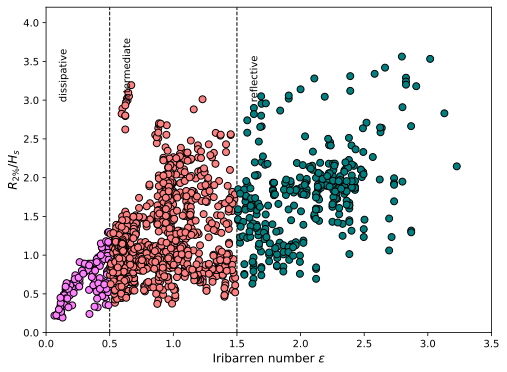

In [6]:
# Set figure parameter
plt.figure(figsize=(8,6))

# Plot vertical dot lines between sediment classes
# define the line like this [x1,x2],[y1,y2]
plt.plot([0.5, 0.5],[0, 5.],'k--',linewidth=1)
plt.plot([1.5, 1.5],[0, 5.],'k--',linewidth=1)
plt.axis([0,3.5,0,4.2]);


# Plot beach types
plt.text(0.1, 3., 'dissipative', fontsize=10, rotation='vertical')
plt.text(0.6, 3., 'intermediate', fontsize=10, rotation='vertical')
plt.text(1.6, 3., 'reflective', fontsize=10, rotation='vertical')

# Plot measured data
ids1 = np.where(df.iribarren<0.5)[0]
plt.plot(df.iribarren[ids1],df.r2[ids1]/df.hs[ids1],'ko',markerfacecolor=[1.0, 0.5, 1.0], markersize=7)
ids2 = np.where(np.logical_and(df.iribarren>=0.5,df.iribarren<1.5))[0]
plt.plot(df.iribarren[ids2],df.r2[ids2]/df.hs[ids2],'ko',markerfacecolor=[1.0, 0.5, 0.5], markersize=7)
ids3 = np.where(df.iribarren>=1.5)[0]
plt.plot(df.iribarren[ids3],df.r2[ids3]/df.hs[ids3],'ko',markerfacecolor=[0.0, 0.5, 0.5], markersize=7)

plt.xlabel('Iribarren number $\epsilon$',fontsize=12)
plt.ylabel('$R_{2\%}/H_s$',fontsize=12)

plt.show()
plt.close()

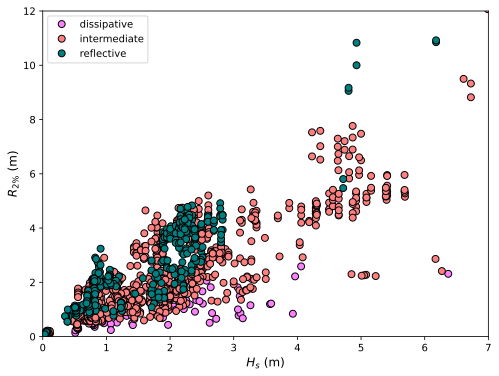

In [7]:
# Set figure parameter
plt.figure(figsize=(8,6))

# Plot vertical dot lines between sediment classes
# define the line like this [x1,x2],[y1,y2]
plt.axis([0,7,0,12]);


# Plot measured data
plt.plot(df.hs[ids1],df.r2[ids1],'ko',markerfacecolor=[1.0, 0.5, 1.0], markersize=7,label='dissipative')
plt.plot(df.hs[ids2],df.r2[ids2],'ko',markerfacecolor=[1.0, 0.5, 0.5], markersize=7,label='intermediate')
plt.plot(df.hs[ids3],df.r2[ids3],'ko',markerfacecolor=[0.0, 0.5, 0.5], markersize=7,label='reflective')

plt.legend(loc=2, fontsize=10)
plt.xlabel('$H_s$ (m)',fontsize=12)
plt.ylabel('$R_{2\%}$ (m)',fontsize=12)

plt.show()
plt.close()